In [8]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data

(trainX , trainY) , (testX , testY) = load_data()

print("Train: " , trainX.shape , trainY.shape)
print("Test: " ,testX.shape , testY.shape)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


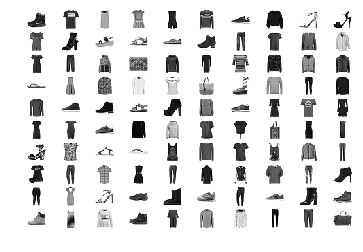

In [11]:
for i in range(100):
    plt.subplot(10 , 10 , 1+i)
    plt.axis('off')
    plt.imshow(trainX[i] , cmap = 'gray_r')
plt.show()

In [12]:
def define_discriminator():
    model = Sequential()
    model.add(Conv2D(128 , (3 , 3) , strides = (2 , 2) , padding = 'same' , input_shape = in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128 , (3 , 3) , strides = (2 , 2) , padding = 'same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1 , activation='sigmoid'))
    
    opt = Adam(lr = 0.0002 , beta_1 = 0.5)
    model.compile(loss = 'binary_crossentropy' , optimizer = opt , metrics = ['accuracy'])
    
    return model

In [13]:
def define_generator():
    model = Sequential()
    n_nodes = 128*7*7
    model.add(Dense(n_nodes , input_dim = latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7 , 7 , 128)))
    model.add(Conv2DTranspose(128 , (4 , 4) , strides = (2 , 2) , padding = 'same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128 , (4 , 4) , strides = (2 , 2) , padding ='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1 , (7 , 7) , activation = 'tanh', padding = 'same'))
    
    return model

In [14]:
def define_gan(generator , discriminator):
    discriminator.trainable = False
    
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    
    opt = Adam(lr = 0.0002 , beta_1 = 0.5)
    model.compile(loss = 'binary_crossentropy' , optimizer = opt)
    
    return model

In [15]:
def load_real_samples():
    (trainX , _) , (_ , _) = load_data()
    X = expand_dims(trainX , axis = -1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5
    
    return X